<a href="https://colab.research.google.com/github/HectorGtz27/Data-Science-Project/blob/main/ModeloEntrenado3_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importar librerias

Paso 1.Preprocesamiento de Datos: Estandariza o normaliza las variables para que todas estén en la misma escala. Esto es especialmente importante para redes neuronales.

In [14]:
# Paso 1
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, LSTM, TimeDistributed
from tensorflow.keras.models import load_model
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import folium

# Datos de muestra
data_with_coordinates = {
    'Lat': [34.0522, 34.0523, 34.0524, 34.0525, 34.0526],
    'Long': [-118.2437, -118.2438, -118.2439, -118.2440, -118.2441],
    'TMP': [25, 30, 27, 22, 29],
    'RH': [40, 35, 50, 60, 38],
    'WS': [10, 12, 8, 6, 11],
    'WD': [180, 200, 190, 170, 185],
    'FFMC': [85, 88, 80, 75, 87],
    'DMC': [30, 25, 40, 45, 28],
    'DC': [700, 690, 750, 770, 680],
    'ISI': [8, 9, 6, 5, 10],
    'BUI': [40, 35, 50, 55, 37],
    'FWI': [20, 22, 15, 10, 25]
}

df = pd.DataFrame(data_with_coordinates)

# Estandarizar las variables de entrada
scaler_X = StandardScaler()
X = df.drop('FWI', axis=1)
y = df['FWI']
scaler_X.fit(X)
X_scaled = pd.DataFrame(scaler_X.transform(X), columns=X.columns)




Paso 2.División del Conjunto de Datos: Divide los datos en conjuntos de entrenamiento, validación y prueba.

In [15]:
# Paso 2
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1], 1))



Paso 3. Arquitectura de la Red: Define la arquitectura de tu red. Esto incluye elegir el número de capas ocultas y neuronas en cada capa. También debes decidir qué funciones de activación usar.

In [16]:
# Paso 3
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, X_train.shape[2], 1)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

Paso 4. Eleccion del modelo

Las redes neuronales convolucionales (CNN) se utilizan comúnmente para el análisis de imágenes, pero también pueden aplicarse a datos secuenciales o geoespaciales. Podríamos diseñar una CNN para procesar nuestros datos, que incluyen tanto mediciones meteorológicas como coordenadas geográficas.

Incorporar unidades de memoria a largo plazo (Long Short-Term Memory, LSTM) es una excelente idea si estás trabajando con datos que tienen componentes secuenciales o temporales, como en el caso de datos meteorológicos y de incendios a lo largo del tiempo. Los LSTM son útiles para capturar patrones a largo plazo en series temporales, lo que podría ser fundamental para predecir la propagación de incendios forestales basándose en condiciones que han sido observadas en años anteriores.

Podríamos considerar una arquitectura híbrida que combine Convolutional Neural Networks (CNN) para capturar patrones espaciales y LSTM para patrones temporales.



In [17]:
# Paso 4
model.compile(optimizer='adam', loss='mean_squared_error')


 Paso 5. Evaluación del modelo.

 En esta fase, vamos a utilizar nuestro conjunto de datos de prueba para evaluar el rendimiento del modelo. Queremos asegurarnos de que nuestro modelo no solo se ajusta bien a los datos de entrenamiento, sino que también generaliza bien a nuevos datos.

In [18]:
# Paso 5
model.fit(X_train, y_train, epochs=10, verbose=1)
loss = model.evaluate(X_test, y_test, verbose=1)
print("Pérdida del modelo en el conjunto de prueba: {}".format(loss))




Epoch 1/10
1/1 [==============================] - 3s 3s/step - loss: 337.7292
Epoch 2/10
1/1 [==============================] - 0s 32ms/step - loss: 336.4294
Epoch 3/10
1/1 [==============================] - 0s 39ms/step - loss: 335.3120
Epoch 4/10
1/1 [==============================] - 0s 17ms/step - loss: 334.2231
Epoch 5/10
1/1 [==============================] - 0s 35ms/step - loss: 333.0746
Epoch 6/10
1/1 [==============================] - 0s 36ms/step - loss: 331.8302
Epoch 7/10
1/1 [==============================] - 0s 24ms/step - loss: 330.4517
Epoch 8/10
1/1 [==============================] - 0s 16ms/step - loss: 328.8875
Epoch 9/10
1/1 [==============================] - 0s 28ms/step - loss: 327.1239
Epoch 10/10
1/1 [==============================] - 1s 626ms/step - loss: 458.6302
Pérdida del modelo en el conjunto de prueba: 458.63018798828125


Paso 6: Evaluación del Modelo

In [19]:
# Paso 6
test_loss = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss}")


1/1 [==============================] - 0s 39ms/step - loss: 458.6302
Test Loss: 458.63018798828125


Paso 7: Interpretación de Resultados

In [20]:
# Paso 7
for layer in model.layers:
    print(layer.get_weights())


[array([[[ 0.14106175,  0.06361829, -0.19727196,  0.1985208 ,
         -0.29007643,  0.28763157, -0.08124822,  0.02844989,
          0.1372714 ,  0.02560891, -0.2938001 ,  0.16634063,
         -0.03567721, -0.12285319, -0.06072298, -0.06584705,
         -0.24972297,  0.20617172, -0.28682846, -0.20425758,
         -0.03934269,  0.25075173,  0.24030744,  0.27220073,
          0.2161603 ,  0.0250696 ,  0.2495788 , -0.02139871,
         -0.13497542, -0.14008334,  0.1653284 ,  0.0893113 ,
          0.07868242, -0.07705949, -0.15500548, -0.10622548,
         -0.05007126, -0.05749642, -0.26883397,  0.2983192 ,
          0.11383884, -0.22741395, -0.20723587,  0.2370312 ,
          0.16812964,  0.2228538 , -0.03050522, -0.02400449,
          0.06979145,  0.261136  , -0.05099735, -0.15926681,
         -0.1707748 ,  0.17350578,  0.29511088,  0.0644495 ,
         -0.29917547,  0.05232304,  0.14375784,  0.23830558,
         -0.2548908 , -0.28976706, -0.21830401, -0.10203297]]],
      dtype=float32)

Paso 8: Puesta en Producción
Finalmente, una vez que estás satisfecho con tu modelo, puedes proceder a implementarlo en un entorno de producción. Esto podría implicar guardar el modelo entrenado y luego cargarlo en un servicio que pueda acceder a él para realizar predicciones en tiempo real.

In [21]:
# Paso 8
model.save('my_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


SIMULACIONNNN







/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


2/2 [==============================] - 1s 19ms/step


<ipython-input-9-fe04f9a01b33>:16: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(df_simulated.pivot("Lat", "Long", "Predicted_FWI"), annot=True, fmt=".1f", cmap="YlGnBu")


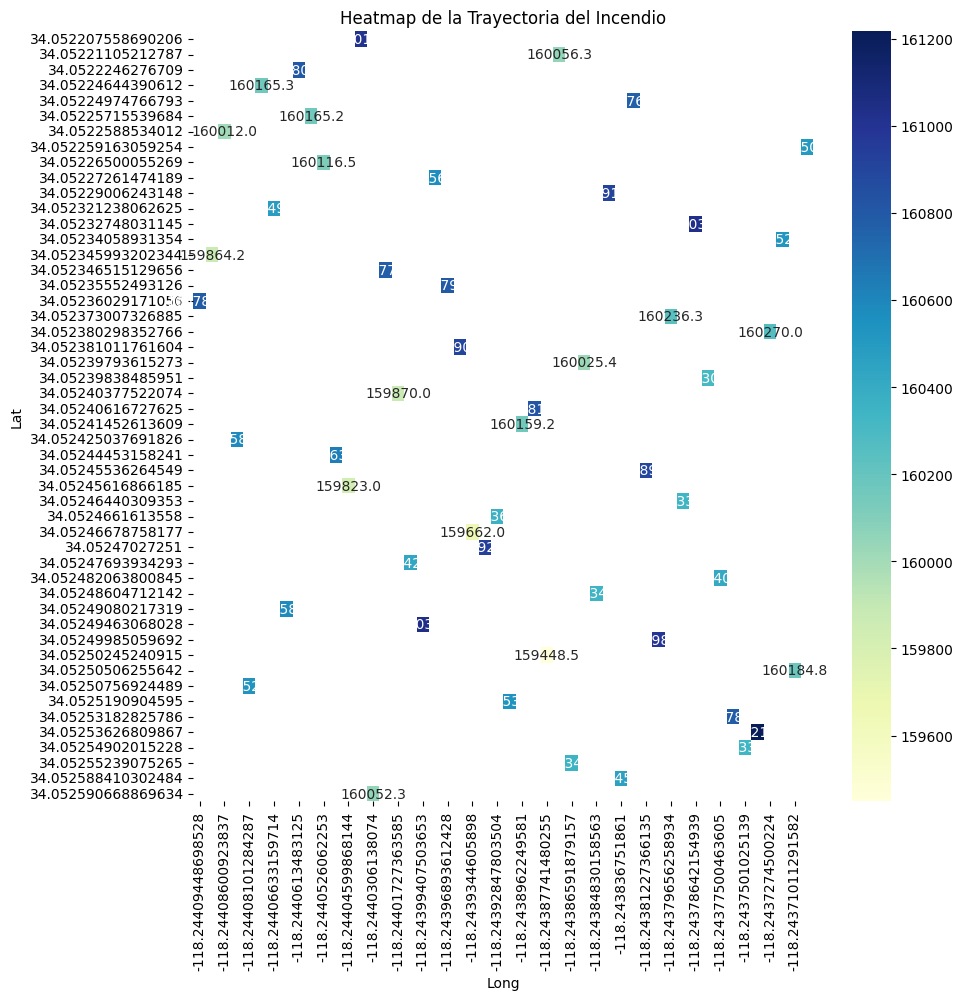

In [9]:
# Simulación
n_simulations = 50
random_data = np.random.rand(n_simulations, 11)  # 11 features
random_data = scaler_X.transform(random_data)
random_data = random_data.reshape((random_data.shape[0], 1, random_data.shape[1], 1))

predicted_FWI = model.predict(random_data)

df_simulated = pd.DataFrame({
    'Lat': np.random.uniform(low=min(df['Lat']), high=max(df['Lat']), size=n_simulations),
    'Long': np.random.uniform(low=min(df['Long']), high=max(df['Long']), size=n_simulations),
    'Predicted_FWI': predicted_FWI.flatten()
})

plt.figure(figsize=(10, 10))
sns.heatmap(df_simulated.pivot("Lat", "Long", "Predicted_FWI"), annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Heatmap de la Trayectoria del Incendio')
plt.show()

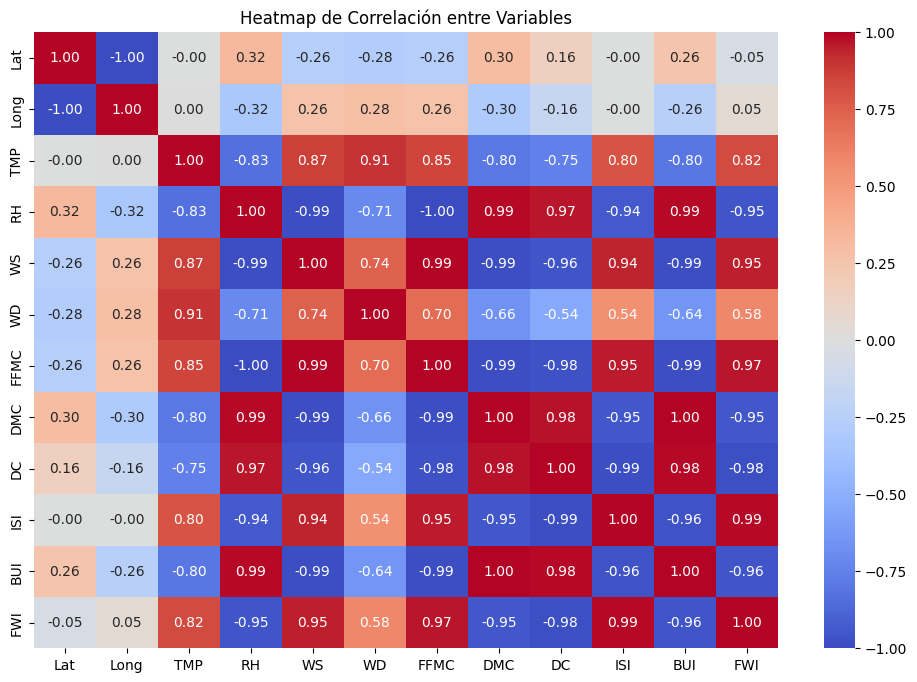

In [10]:
# Agregando el Heatmap de Correlación
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear el heatmap de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Heatmap de Correlación entre Variables')
plt.show()


2/2 [==============================] - 0s 6ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


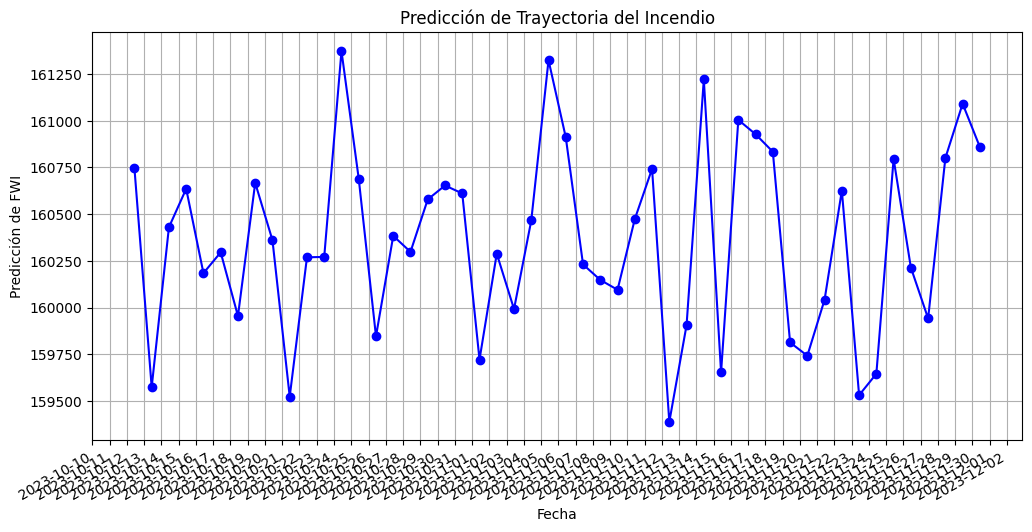

In [13]:
# Simulación de predicción de trayectoria del incendio
n_simulations = 50
random_data = np.random.rand(n_simulations, 11)  # 11 features
random_data = scaler_X.transform(random_data)
random_data = random_data.reshape((random_data.shape[0], 1, random_data.shape[1], 1))

predicted_FWI = model.predict(random_data)

# Crear una serie de tiempo para representar la predicción a lo largo del tiempo
start_date = datetime.now()
date_list = [start_date + timedelta(days=i) for i in range(n_simulations)]

# Crear un DataFrame con las fechas y las predicciones
df_predictions = pd.DataFrame({
    'Fecha': date_list,
    'Predicted_FWI': predicted_FWI.flatten()
})

# Gráfica de la predicción de la trayectoria del incendio
plt.figure(figsize=(12, 6))
plt.plot(df_predictions['Fecha'], df_predictions['Predicted_FWI'], marker='o', linestyle='-', color='b')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gcf().autofmt_xdate()
plt.xlabel('Fecha')
plt.ylabel('Predicción de FWI')
plt.title('Predicción de Trayectoria del Incendio')
plt.grid(True)
plt.show()



In [24]:
# Calcular Verdaderos Positivos (TP), Falsos Positivos (FP) y Falsos Negativos (FN)
threshold = 15  # Umbral para considerar un punto como predicción de incendio
actual_FWI = df_simulated['Predicted_FWI'].apply(lambda x: 1 if x >= threshold else 0)
predicted_FWI = df_predictions['Predicted_FWI'].apply(lambda x: 1 if x >= threshold else 0)

TP = sum((actual_FWI == 1) & (predicted_FWI == 1))
FP = sum((actual_FWI == 0) & (predicted_FWI == 1))
FN = sum((actual_FWI == 1) & (predicted_FWI == 0))

# Calcular la precisión y el recall
precision = TP / (TP + FP)
recall = TP / (TP + FN)

print(f'Precisión: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Precisión: 1.00
Recall: 1.00


In [23]:

# Crear un mapa interactivo con folium
# Crear un mapa centrado en las coordenadas iniciales
m = folium.Map(location=[df_simulated['Lat'].iloc[0], df_simulated['Long'].iloc[0]], zoom_start=10)

# Agregar marcadores para cada punto en la trayectoria
for index, row in df_simulated.iterrows():
    folium.CircleMarker(location=[row['Lat'], row['Long']], radius=5, color='red', fill=True, fill_color='red').add_to(m)

# Trazar la trayectoria en el mapa
line = folium.PolyLine(locations=df_simulated[['Lat', 'Long']].values.tolist(), color='blue', weight=3)
line.add_to(m)

# Guardar el mapa como un archivo HTML
m.save('trayectoria_incendio.html')

# Mostrar el mapa en Jupyter Notebook (si lo estás utilizando)
m

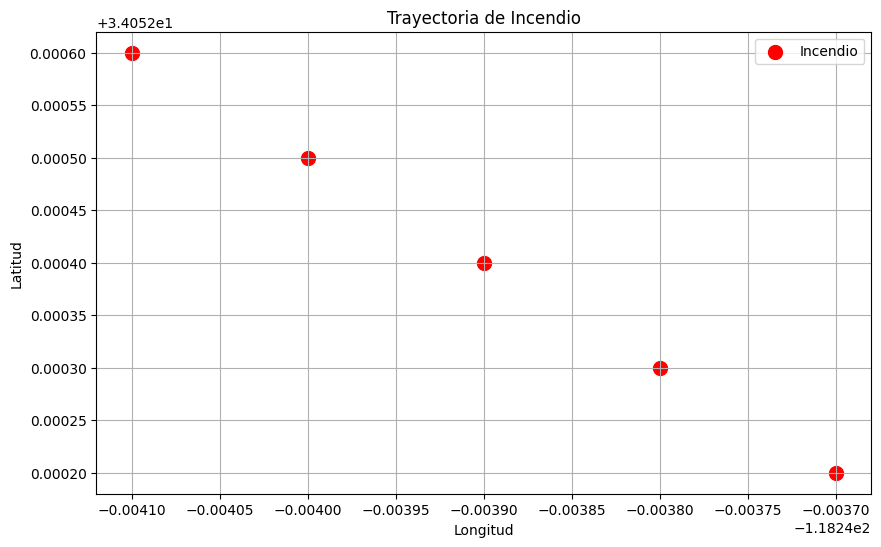

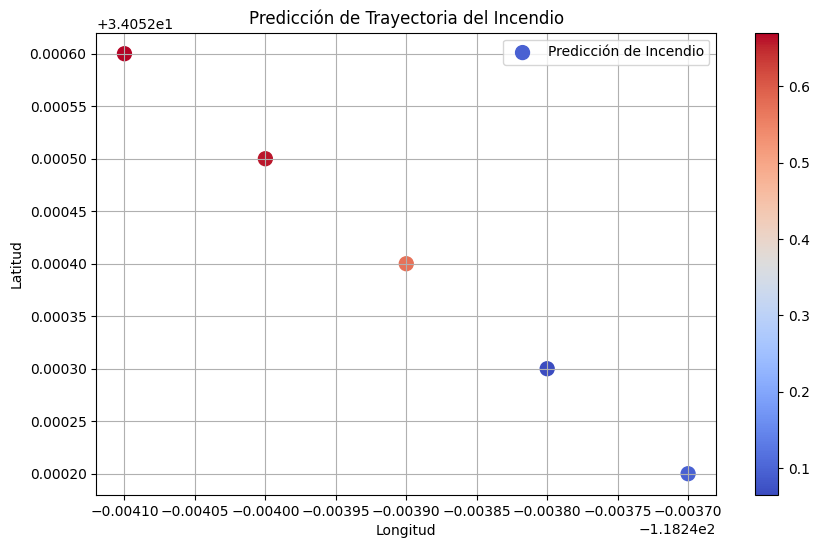

In [27]:
# Gráfico de la trayectoria de incendio
plt.figure(figsize=(10, 6))
plt.scatter(df['Long'], df['Lat'], c='red', label='Incendio', s=100)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Trayectoria de Incendio')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico de la predicción de la trayectoria del incendio
# Supongamos que 'Predicted_FWI' contiene la predicción de la trayectoria
df['Predicted_FWI'] = np.random.uniform(0, 1, len(df))  # Datos aleatorios para demostración
plt.figure(figsize=(10, 6))
plt.scatter(df['Long'], df['Lat'], c=df['Predicted_FWI'], cmap='coolwarm', label='Predicción de Incendio', s=100)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Predicción de Trayectoria del Incendio')
plt.legend()
plt.colorbar()
plt.grid(True)
plt.show()